# Ocena modelu
## Zbiór danych 
https://www.kaggle.com/datasets/erdemtaha/cancer-data 

Będziemy pracować na zbiorze danych dotyczącym raka piersi.

In [1]:
# Import wymaganych bibliotek
from  sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
# Pobranie danych
os.chdir('../')

df = pd.read_csv('data/Cancer_Data.csv')
train_x = pd.read_csv('data/cancer_train_x.csv').iloc[:,1:]
test_x = pd.read_csv('data/cancer_test_x.csv').iloc[:,1:]
train_y = pd.read_csv('data/cancer_train_y.csv')['target']
test_y = pd.read_csv('data/cancer_test_y.csv')['target']

## Estymacja modelu

In [3]:
# Stworzenie obiektu modelu
model_1 = LogisticRegression()

In [4]:
# Estymacja 
model_1.fit(train_x,train_y)

LogisticRegression()

## Ocena jakości
### Metryki bazujące na klasie

In [5]:
from sklearn.metrics import (f1_score,
                             accuracy_score, 
                             confusion_matrix, 
                             precision_score, 
                             recall_score,
                             classification_report)


In [6]:
# predykcje
train_pred  = model_1.predict(train_x)
test_pred  = model_1.predict(test_x)

In [7]:
# accuracy 
acc_train  = round(accuracy_score(train_y, train_pred),3)
acc_test = round(accuracy_score(test_y, test_pred),3)
print(f'Accuracy train: {acc_train} \n Accuracy test: {acc_test}')


Accuracy train: 0.943 
 Accuracy test: 0.961


In [8]:
train_y.value_counts()

target
0    254
1     98
Name: count, dtype: int64

In [9]:
train_y.value_counts() / len(train_y)

target
0    0.721591
1    0.278409
Name: count, dtype: float64

In [10]:
# precision
pr_train = round(precision_score(train_y, train_pred),3)
pr_test = round(precision_score(test_y, test_pred),3)
print(f'Precision train: {pr_train} \n Precision test: {pr_test}')

Precision train: 0.924 
 Precision test: 0.946


In [11]:
# recall
re_train = round(recall_score(train_y,train_pred),3)
re_test = round(recall_score(test_y, test_pred),3)
print(f'Recall train: {re_train} \nRecall test: {re_test}')

Recall train: 0.867 
Recall test: 0.946


In [12]:
# f1 score
f1_train = round(f1_score(train_y, train_pred),3)
f1_test = round(f1_score(test_y, test_pred),3)
print(f'F1 train: {f1_train} \nF1 test: {f1_test}')

F1 train: 0.895 
F1 test: 0.946


In [13]:
# classification_report train
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       254
           1       0.92      0.87      0.89        98

    accuracy                           0.94       352
   macro avg       0.94      0.92      0.93       352
weighted avg       0.94      0.94      0.94       352



In [14]:
# classification_report test
print(classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        96
           1       0.95      0.95      0.95        56

    accuracy                           0.96       152
   macro avg       0.96      0.96      0.96       152
weighted avg       0.96      0.96      0.96       152



### Metryki bazujące na prawdopodobieństwie

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

In [21]:
# Predykcje
train_pred_p =model_1.predict_proba(train_x)[:,1]
train_pred_p

array([8.83014878e-01, 9.65428039e-03, 4.66999291e-02, 2.43964991e-03,
       2.15332602e-02, 2.97663557e-01, 1.98833900e-02, 4.85322069e-01,
       1.00491415e-02, 6.37523831e-02, 4.63453904e-04, 2.12242561e-03,
       4.63227650e-05, 7.30025251e-02, 2.83069398e-02, 6.38177169e-01,
       1.01180957e-03, 1.10486916e-02, 3.05072698e-01, 5.98384514e-02,
       9.99973695e-01, 3.64088129e-03, 9.57068417e-01, 1.31037066e-02,
       9.94404458e-01, 2.84269390e-02, 1.19781648e-02, 6.80477510e-03,
       1.04960967e-03, 2.23395489e-05, 1.03913472e-02, 5.12733955e-03,
       2.27222756e-02, 5.48634510e-03, 4.75944970e-03, 5.93449770e-04,
       9.87951099e-01, 2.61238976e-03, 9.99999669e-01, 7.23597670e-01,
       4.97738786e-02, 9.66926055e-02, 4.02194956e-05, 9.97815052e-02,
       2.71815701e-02, 9.92475349e-01, 5.58391751e-01, 1.01779622e-03,
       4.88916632e-02, 3.49512079e-01, 9.54215931e-02, 2.04057223e-02,
       7.47037095e-01, 7.45460335e-04, 1.38884019e-02, 1.03515037e-02,
      

In [22]:
test_pred_p = model_1.predict_proba(test_x)[:,1]

In [23]:
# Pole pod krzywą roc
auc_train = round(roc_auc_score(train_y, train_pred_p),3)
auc_test  = round(roc_auc_score(test_y, test_pred_p),3)

In [24]:
# Przygotwanie danych do wykresu
fpr_train, tpr_train,thresholds_train = roc_curve(train_y, train_pred_p)
fpr_test, tpr_test, thresholds_test = roc_curve(test_y, test_pred_p)


In [25]:
fpr_test

array([0.        , 0.        , 0.        , 0.01041667, 0.01041667,
       0.02083333, 0.02083333, 0.03125   , 0.03125   , 0.05208333,
       0.05208333, 0.08333333, 0.08333333, 0.09375   , 0.09375   ,
       1.        ])

In [26]:
tpr_test

array([0.        , 0.01785714, 0.78571429, 0.78571429, 0.91071429,
       0.91071429, 0.92857143, 0.92857143, 0.94642857, 0.94642857,
       0.96428571, 0.96428571, 0.98214286, 0.98214286, 1.        ,
       1.        ])

In [27]:
thresholds_test

array([           inf, 9.99999013e-01, 8.92603780e-01, 8.73560958e-01,
       6.97057987e-01, 6.89940103e-01, 6.53789741e-01, 6.26925647e-01,
       6.09449317e-01, 4.26777936e-01, 3.89364255e-01, 2.31381336e-01,
       2.29523437e-01, 2.29404008e-01, 2.09611944e-01, 1.66812737e-05])

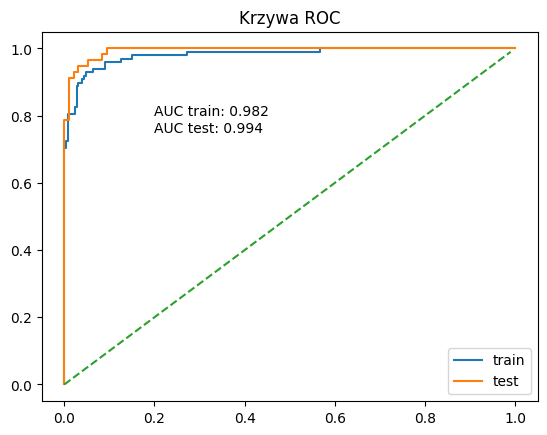

In [28]:
# Wykres
plt.plot(fpr_train, tpr_train, label='train')
plt.plot(fpr_test,tpr_test, label='test')
plt.plot(np.arange(0,1,0.01),np.arange(0,1,0.01),'--')
plt.legend()
plt.annotate(f'AUC train: {auc_train}',xy=[0.2,0.8])
plt.annotate(f'AUC test: {auc_test}',xy=[0.2,0.75])
plt.title('Krzywa ROC')
plt.show()